From the n independent variables of your dataset, LDA extracts p<=n new independent variables that seperate the most the classes of the dependent variable.
The fact that DV is considered makes LDA is supervised model.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Wine.csv')
df.head()
x = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values
#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)
#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

#applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
trainx = lda.fit_transform(trainx, trainy)
testx = lda.transform(testx)



In [8]:
#fitting the model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
model = reg.fit(trainx, trainy)



#checking the prediction accuracy.
predy = model.predict(testx)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy, predy)
pd.DataFrame(cm)

,0,1,2
0,16,0,0
1,0,21,0
2,0,0,8


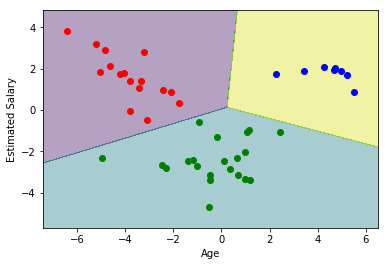

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = testx, testy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_setd = pd.DataFrame(X_set)
x_p = X_setd.loc[(y_set ==1), :].values
x_n = X_setd.loc[(y_set ==2), :].values
x_i = X_setd.loc[(y_set ==3), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')
plt.scatter(x_i[:, 0], x_i[:, 1], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()